# Pandas

## Pandas, pour quel genre de données ?

In [1]:
import pandas as pd

To load the pandas package and start working with it, import the package. The community agreed alias for pandas is pd, so loading pandas as pd is assumed standard practice for all of the pandas documentation.

### représentation d'une table de données pandas

![](img/01_table_dataframe.svg)

I want to store passenger data of the Titanic. For a number of passengers, I know the name (characters), age (integers) and sex (male/female) data.

In [2]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)


df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


To manually store data in a table, create a DataFrame. When using a Python dictionary of lists, the dictionary keys will be used as column headers and the values in each list as columns of the DataFrame.

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table or the data.frame in R.

- The table has 3 columns, each of them with a column label. The column labels are respectively Name, Age and Sex.
- The column Name consists of textual data with each value a string, the column Age are numbers and the column Sex is textual data.

In spreadsheet software, the table representation of our data would look very similar:

![](img/01_table_spreadsheet.png)

In [3]:
### Chaque colonne est une Series

![](img/01_table_series.svg)

Je m'intéresse uniquement aux données dans la colonne `Age`

In [4]:
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

When selecting a single column of a pandas DataFrame, the result is a pandas Series. To select the column, use the column label in between square brackets [].

<div class='alert alert-info'>
If you are familiar to Python dictionaries, the selection of a single column is very similar to selection of dictionary values based on the key.
</div>

On peut créer une Series ex-nihilo :

In [5]:
ages = pd.Series([22, 35, 58], name="Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

A pandas Series has no column labels, as it is just a single column of a DataFrame. A Series does have row labels.

### Faire qqchose avec une series

I want to know the maximum Age of the passengers

We can do this on the DataFrame by selecting the Age column and applying max():

In [6]:
df["Age"].max()

58

idem sur une simple `Series` :

In [7]:
ages.max()

58

As illustrated by the max() method, you can do things with a DataFrame or Series. pandas provides a lot of functionalities, each of them a method you can apply to a DataFrame or Series. As methods are functions, do not forget to use parentheses ().

### Je veux voir des stats de base sur mes données numériques 

In [8]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


The describe() method provides a quick overview of the numerical data in a DataFrame. As the Name and Sex columns are textual data, these are by default not taken into account by the describe() method.

Many pandas operations return a DataFrame or a Series. The describe() method is an example of a pandas operation returning a pandas Series or a pandas DataFrame.

<div class='alert alert-info'>


This is just a starting point. Similar to spreadsheet software, pandas represents data as a table with columns and rows. Apart from the representation, also the data manipulations and calculations you would do in spreadsheet software are supported by pandas. Continue reading the next tutorials to get started!

</div>

<div class='alert alert-success'>




- Import the package, aka `import pandas as pd`
- A table of data is stored as a pandas `DataFrame`
- Each column in a `DataFrame` is a `Series`
- You can do things by applying a method to a `DataFrame` ou une`Series`

</div>

## Comment lire et écrire des données tabulaires

![](img/02_io_readwrite.svg)

Je veux analyser les données des passagers du Titanic, disponible sous la forme d'un fichier csv

In [9]:
# création d'un sous-dossier data
!mkdir data
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv > data/titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0   136k      0 --:--:-- --:--:-- --:--:--  136k


In [10]:
# chargement du CSV dans une DataFrame
titanic = pd.read_csv("data/titanic.csv")

pandas provides the read_csv() function to read data stored as a csv file into a pandas DataFrame. pandas supports many different file formats or data sources out of the box (csv, excel, sql, json, parquet, …), each of them with the prefix read_*.

Make sure to always have a check on the data after reading in the data. When displaying a DataFrame, the first and last 5 rows will be shown by default:

In [11]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Je veux voir les 8 premières lignes de la DataFrame :

In [12]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


To see the first N rows of a DataFrame, use the head() method with the required number of rows (in this case 8) as argument.

Similairement, la méthode `.tail(n)` affiche les `n` dernières lignes, et `.sample(n)` tire `n` lignes au hasard.

A check on how pandas interpreted each of the column data types can be done by requesting the pandas dtypes attribute:


In [13]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

For each of the columns, the used data type is enlisted. The data types in this DataFrame are integers (int64), floats (float64) and strings (object).

<div class='alert alert-info'>
    
When asking for the dtypes, no brackets are used! dtypes is an attribute of a DataFrame and Series. Attributes of DataFrame or Series do not need brackets. Attributes represent a characteristic of a DataFrame/Series, whereas a method (which requires brackets) do something with the DataFrame/Series as introduced in the first tutorial.

</div>

My colleague requested the Titanic data as a spreadsheet.

In [14]:
# pour les utilisateurs d'anaconda
!conda install -c anaconda openpyxl

zsh:1: command not found: conda


In [15]:
# pour ceux qui utilisent pip directement
!pip install openpyxl

In [16]:
# création d'un sous-dossier export
!mkdir export

# export avec la méthode .to_excel()
titanic.to_excel(
    "export/titanic.xlsx", sheet_name="passengers", index=False
)  # export vers excel

Whereas read_* functions are used to read data to pandas, the to_* methods are used to store data. The to_excel() method stores the data as an excel file. In the example here, the sheet_name is named passengers instead of the default Sheet1. By setting index=False the row index labels are not saved in the spreadsheet.

In [17]:
titanic = pd.read_excel("export/titanic.xlsx", sheet_name="passengers")

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Je veux un résumé technique de ma `DataFrame`

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The method info() provides technical information about a DataFrame, so let’s explain the output in more detail:

    It is indeed a DataFrame.

    There are 891 entries, i.e. 891 rows.

    Each row has a row label (aka the index) with values ranging from 0 to 890.

    The table has 12 columns. Most columns have a value for each of the rows (all 891 values are non-null). Some columns do have missing values and less than 891 non-null values.

    The columns Name, Sex, Cabin and Embarked consists of textual data (strings, aka object). The other columns are numerical data with some of them whole numbers (aka integer) and others are real numbers (aka float).

    The kind of data (characters, integers,…) in the different columns are summarized by listing the dtypes.

    The approximate amount of RAM used to hold the DataFrame is provided as well.


<div class='alert alert-info'>


- Getting data in to pandas from many different file formats or data sources is supported by read_* functions.

- Exporting data out of pandas is provided by different to_*methods.

- The head/tail/info methods and the dtypes attribute are convenient for a first check.

</div>

## Sélectionner un sous-ensemble d'une `DataFrame`

In [20]:
# création de la dataframe en repartant du CSV titanic
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Comment sélectionner certaines colonnes 

![](img/03_subset_columns.svg)

Je veux uniquement l'âge des passagers

In [21]:
ages = titanic["Age"]

In [22]:
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

To select a single column, use square brackets [] with the column name of the column of interest.

Each column in a DataFrame is a Series. As a single column is selected, the returned object is a pandas Series. We can verify this by checking the type of the output:

In [23]:
type(titanic["Age"])

pandas.core.series.Series

And have a look at the shape of the output:

In [24]:
titanic["Age"].shape

(891,)

DataFrame.shape is an attribute (remember tutorial on reading and writing, do not use parentheses for attributes) of a pandas Series and DataFrame containing the number of rows and columns: (nrows, ncolumns). A pandas Series is 1-dimensional and only the number of rows is returned.

I’m interested in the age and sex of the Titanic passengers.

In [25]:
age_sex = titanic[["Age", "Sex"]]

In [26]:
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


To select multiple columns, use a list of column names within the selection brackets [].

<div class='alert alert-info'>

The inner square brackets define a Python list with column names, whereas the outer brackets are used to select the data from a pandas DataFrame as seen in the previous example.

</div>

The returned data type is a pandas DataFrame:

In [27]:
type(titanic[["Age", "Sex"]])

pandas.core.frame.DataFrame

In [28]:
titanic[["Age", "Sex"]].shape

(891, 2)

The selection returned a DataFrame with 891 rows and 2 columns. Remember, a DataFrame is 2-dimensional with both a row and column dimension.

### Comment sélectionner certaines lignes dans la `DataFrame` 

I’m interested in the passengers older than 35 years.

In [29]:
above_35 = titanic[titanic["Age"] > 35]

In [30]:
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


To select rows based on a conditional expression, use a condition inside the selection brackets [].

The condition inside the selection brackets titanic["Age"] > 35 checks for which rows the Age column has a value larger than 35:

In [31]:
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

The output of the conditional expression (>, but also ==, !=, <, <=,… would work) is actually a pandas Series of boolean values (either True or False) with the same number of rows as the original DataFrame. Such a Series of boolean values can be used to filter the DataFrame by putting it in between the selection brackets []. Only rows for which the value is True will be selected.

We know from before that the original Titanic DataFrame consists of 891 rows. Let’s have a look at the number of rows which satisfy the condition by checking the shape attribute of the resulting DataFrame above_35:

In [32]:
above_35.shape

(217, 12)

I’m interested in the Titanic passengers from cabin class 2 and 3.

In [33]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Similar to the conditional expression, the isin() conditional function returns a True for each row the values are in the provided list. To filter the rows based on such a function, use the conditional function inside the selection brackets []. In this case, the condition inside the selection brackets titanic["Pclass"].isin([2, 3]) checks for which rows the Pclass column is either 2 or 3.


The above is equivalent to filtering by rows for which the class is either 2 or 3 and combining the two statements with an | (or) operator:


In [34]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


<div class='alert alert-info'>



When combining multiple conditional statements, each condition must be surrounded by parentheses (). Moreover, you can not use or/and but need to use the or operator | and the and operator &.


</div>

I want to work with passenger data for which the age is known.

In [35]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The notna() conditional function returns a True for each row the values are not an Null value. As such, this can be combined with the selection brackets [] to filter the data table.

You might wonder what actually changed, as the first 5 lines are still the same values. One way to verify is to check if the shape has changed:

In [36]:
age_no_na.shape

(714, 12)

### Comment sélectionner des lignes et colonnes spécifiques

![](img/03_subset_columns_rows.svg)

I’m interested in the names of the passengers older than 35 years.

In [37]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]

In [38]:
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

In this case, a subset of both rows and columns is made in one go and just using selection brackets [] is not sufficient anymore. The loc/iloc operators are required in front of the selection brackets []. When using loc/iloc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select.

When using the column names, row labels or a condition expression, use the loc operator in front of the selection brackets []. For both the part before and after the comma, you can use a single label, a list of labels, a slice of labels, a conditional expression or a colon. Using a colon specifies you want to select all rows or columns.

I’m interested in rows 10 till 25 and columns 3 to 5.

In [39]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


    Again, a subset of both rows and columns is made in one go and just using selection brackets [] is not sufficient anymore. When specifically interested in certain rows and/or columns based on their position in the table, use the iloc operator in front of the selection brackets [].

When selecting specific rows and/or columns with loc or iloc, new values can be assigned to the selected data. For example, to assign the name anonymous to the first 3 elements of the third column:

In [40]:
titanic.iloc[0:3, 3] = "anonymous"

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class='alert alert-info'>


REMEMBER

- When selecting subsets of data, square brackets [] are used.

-   Inside these brackets, you can use a single column/row label, a list of column/row labels, a slice of labels, a conditional expression or a colon.

-   Select specific rows and/or columns using loc when using the row and column names

-   Select specific rows and/or columns using iloc when using the positions in the table

-   You can assign new values to a selection based on loc/iloc.



</div>

## Comment faire des graphes en Pandas

In [42]:
import matplotlib.pyplot as plt

In [43]:
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv > data/air_quality_no2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31984  100 31984    0     0   136k      0 --:--:-- --:--:-- --:--:--  136k


In [44]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)

air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


<div class='alert alert-info'>



The usage of the index_col and parse_dates parameters of the read_csv function to define the first (0th) column as index of the resulting DataFrame and convert the dates in the column to Timestamp objects, respectively.
    
    
</div>

![](img/04_plot_overview.svg)

I want a quick visual check of the data.

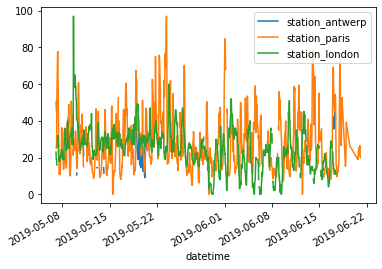

In [45]:
air_quality.plot();

With a DataFrame, pandas creates by default one line plot for each of the columns with numeric data.

I want to plot only the columns of the data table with the data from Paris.

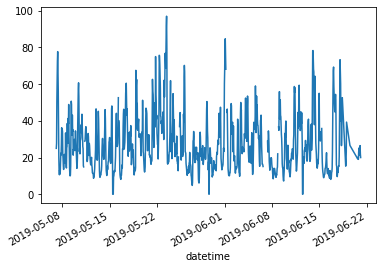

In [46]:
air_quality["station_paris"].plot();

To plot a specific column, use the selection method of the subset data tutorial in combination with the plot() method. Hence, the plot() method works on both Series and DataFrame.

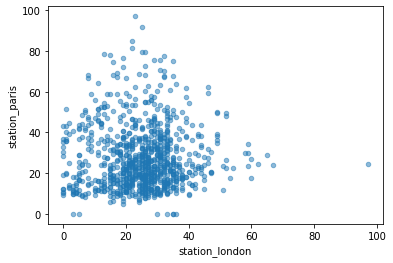

In [47]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5);

Apart from the default line plot when using the plot function, a number of alternatives are available to plot data. Let’s use some standard Python to get an overview of the available plot methods:

In [48]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<div class='alert alert-info'>

In many development environments as well as IPython and Jupyter Notebook, use the TAB button to get an overview of the available methods, for example air_quality.plot. + TAB.

</div>

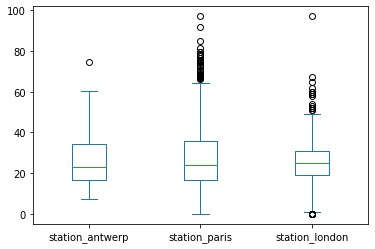

In [49]:
air_quality.plot.box();

I want each of the columns in a separate subplot.

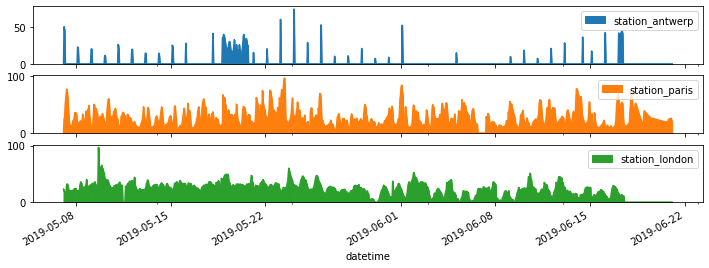

In [50]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

Separate subplots for each of the data columns are supported by the subplots argument of the plot functions. The builtin options available in each of the pandas plot functions are worth reviewing.

I want to further customize, extend or save the resulting plot.

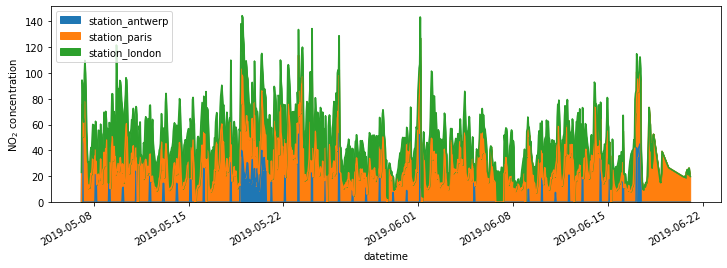

In [51]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("export/no2_concentrations.png")

Each of the plot objects created by pandas is a matplotlib object. As Matplotlib provides plenty of options to customize plots, making the link between pandas and Matplotlib explicit enables all the power of matplotlib to the plot. This strategy is applied in the previous example:

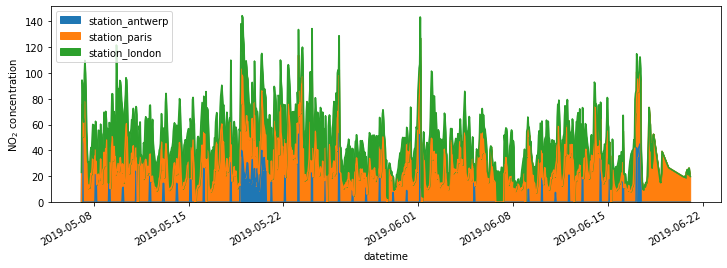

In [52]:
fig, axs = plt.subplots(figsize=(12, 4))  # Create an empty matplotlib Figure and Axes
air_quality.plot.area(
    ax=axs
)  # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("NO$_2$ concentration")  # Do any matplotlib customization you like
fig.savefig(
    "export/no2_concentrations.png"
)  # Save the Figure/Axes using the existing matplotlib method.

<div class="alert alert-info">


- The `.plot.*` methods are applicable on both Series and DataFrames
- By default, each of the columns is plotted as a different element (line, boxplot,…)
- Any plot created by pandas is a Matplotlib object.


</div>

## Comment créer de nouvelles colonnes dérivées des colonnes existantes 

![](img/05_newcolumn_1.svg)

In [53]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)

air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


I want to express the $NO_2$ concentration of the station in London in mg/m

*(If we assume temperature of 25 degrees Celsius and pressure of 1013 hPa, the conversion factor is 1.882)*

In [54]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


<div class='alert alert-info'>

The calculation of the values is done element_wise. This means all values in the given column are multiplied by the value 1.882 at once. You do not need to use a loop to iterate each of the rows!

</div>

![](img/05_newcolumn_2.svg)

I want to check the ratio of the values in Paris versus Antwerp and save the result in a new column

In [55]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)


air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


    The calculation is again element-wise, so the / is applied for the values in each row.

Also other mathematical operators (+, -, \*, /) or logical operators (<, >, =,…) work element wise. The latter was already used in the subset data tutorial to filter rows of a table using a conditional expression.

If you need more advanced logic, you can use arbitrary Python code via apply().

    I want to rename the data columns to the corresponding station identifiers used by openAQ

In [56]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

In [57]:
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


    The rename() function can be used for both row labels and column labels. Provide a dictionary with the keys the current names and the values the new names to update the corresponding names.

The mapping should not be restricted to fixed names only, but can be a mapping function as well. For example, converting the column names to lowercase letters can be done using a function as well:

In [58]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)

air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


<div class'alert alert-info'>


- Create a new column by assigning the output to the DataFrame with a new column name in between the [].
- Operations are element-wise, no need to loop over rows.
- Use rename with a dictionary or function to rename row labels or column names.



</div>

## Comment calculer des statistiques sur mes données 
Données pour cette section : Titanic

In [59]:
# recréons notre DataFrame titanic à partir du csv
titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### stats aggrégées

![](img/06_aggregate.svg)

What is the average age of the Titanic passengers?

In [60]:
titanic["Age"].mean()

29.69911764705882

Different statistics are available and can be applied to columns with numerical data. Operations in general exclude missing data and operate across rows by default.

![](img/06_reduction.svg)

What is the median age and ticket fare price of the Titanic passengers?

In [61]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

    The statistic applied to multiple columns of a DataFrame (the selection of two columns return a DataFrame, see the subset data tutorial) is calculated for each numeric column.

The aggregating statistic can be calculated for multiple columns at the same time. Remember the describe function from first tutorial?

In [62]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the DataFrame.agg() method:

In [63]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


## Aggregating statistics grouped by category

![](img/06_groupby.svg)

What is the average age for male versus female Titanic passengers?

In [64]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


As our interest is the average age for each gender, a subselection on these two columns is made first: titanic[["Sex", "Age"]]. Next, the groupby() method is applied on the Sex column to make a group per category. The average age for each gender is calculated and returned.

https://pandas.pydata.org/docs/_images/06_groupby.svg

Calculating a given statistic (e.g. mean age) for each category in a column (e.g. male/female in the Sex column) is a common pattern. The groupby method is used to support this type of operations. More general, this fits in the more general split-apply-combine pattern:

- Split the data into groups
- Apply a function to each group independently
- Combine the results into a data structure

The apply and combine steps are typically done together in pandas.

In the previous example, we explicitly selected the 2 columns first. If not, the mean method is applied to each column containing numerical columns:

In [65]:
titanic.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


It does not make much sense to get the average value of the Pclass. if we are only interested in the average age for each gender, the selection of columns (rectangular brackets [] as usual) is supported on the grouped data as well:

In [66]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

![](06_groupby_select_detail.svg)

<div class='alert alert-info'>

The Pclass column contains numerical data but actually represents 3 categories (or factors) with respectively the labels ‘1’, ‘2’ and ‘3’. Calculating statistics on these does not make much sense. Therefore, pandas provides a Categorical data type to handle this type of data. More information is provided in the user guide Categorical data section.

</div>

What is the mean ticket fare price for each of the sex and cabin class combinations?


In [67]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

Grouping can be done by multiple columns at the same time. Provide the column names as a list to the groupby() method.

### Compter le nombre d’enregistrements par catégorie

![](img/06_valuecounts.svg)

    The value_counts() method counts the number of records for each category in a column.

The function is a shortcut, as it is actually a groupby operation in combination with counting of the number of records within each group:

In [68]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

<div class='alert alert-info'>


Both size and count can be used in combination with groupby. Whereas size includes NaN values and just provides the number of rows (size of the table), count excludes the missing values. In the value_counts method, use the dropna argument to include or exclude the NaN values.

</div>

<div class='alert alert-warning'>



- Aggregation statistics can be calculated on entire columns or rows
- groupby provides the power of the split-apply-combine pattern
- value_counts is a convenient shortcut to count the number of entries in each category of a variable

    
</div>

## How to reshape the layout of tables

### Données pour cette section

In [69]:
titanic = pd.read_csv("data/titanic.csv")

In [70]:
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_long.csv > data/air_quality_long.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0   663k      0 --:--:-- --:--:-- --:--:--  662k


In [71]:
air_quality = pd.read_csv(
    "data/air_quality_long.csv", index_col="date.utc", parse_dates=True
)

In [72]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


### Classer les lignes de la `DataFrame`

I want to sort the Titanic data according to the age of the passengers.

In [73]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


I want to sort the Titanic data according to the cabin class and age in descending order.

In [74]:
titanic.sort_values(by=["Pclass", "Age"], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


With `Series.sort_values()`, the rows in the table are sorted according to the defined column(s). The index will follow the row order.


### Long to wide table format


Let’s use a small subset of the air quality data set. We focus on data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called no2_subset

In [75]:
# filter for no2 data only

no2 = air_quality[air_quality["parameter"] == "no2"]

In [76]:
# use 2 measurements (head) for each location (groupby)

no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [77]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


![](img/07_pivot.svg)

I want the values for the three stations as separate columns next to each other


In [78]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


The `pivot()` function is purely reshaping of the data: a single value for each index/column combination is required.

As pandas support plotting of multiple columns (see plotting tutorial) out of the box, the conversion from long to wide table format enables the plotting of the different time series at the same time:


In [79]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


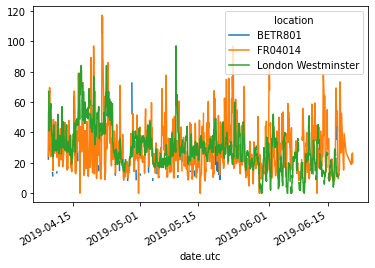

In [80]:
no2.pivot(columns="location", values="value").plot();

<div class='alert alert-info'>

When the index parameter is not defined, the existing index (row labels) is used.

</div>

### Pivoter la table

![](img/07_pivot_table.svg)


I want the mean concentrations for $NO_2$ and $PM_{2.5}$ in each of the stations in table form

In [81]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of pivot(), the data is only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps) pivot_table() can be used, providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in summary columns for each variable separately as well, put the margin parameter to True:

In [82]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In case you are wondering, pivot_table() is indeed directly linked to groupby(). The same result can be derived by grouping on both parameter and location:

`air_quality.groupby(["parameter", "location"]).mean()`



### Wide to long format

Starting again from the wide format table created in the previous section:

In [83]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


![](img/07_melt.svg)

I want to collect all air quality $NO_2$ measurements in a single column (long format)

In [84]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


    The pandas.melt() method on a DataFrame converts the data table from wide format to long format. The column headers become the variable names in a newly created column.

The solution is the short version on how to apply pandas.melt(). The method will melt all columns NOT mentioned in id_vars together into two columns: A column with the column header names and a column with the values itself. The latter column gets by default the name value.

The pandas.melt() method can be defined in more detail:

In [85]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)

no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The result in the same, but in more detail defined:

- value_vars defines explicitly which columns to melt together
- value_name provides a custom column name for the values column instead of the default column name value
- var_name provides a custom column name for the column collecting the column header names. Otherwise it takes the index name or a default variable

Hence, the arguments value_name and var_name are just user-defined names for the two generated columns. The columns to melt are defined by id_vars and value_vars.

<div class='alert alert-info'>

- Sorting by one or more columns is supported by sort_values
- The pivot function is purely restructuring of the data, pivot_table supports aggregations
- The reverse of pivot (long to wide format) is melt (wide to long format)


</div>

## How to combine data from multiple tables?

Données pour cette section :

In [86]:
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv > data/air_quality_no2_long.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  132k  100  132k    0     0   397k      0 --:--:-- --:--:-- --:--:--  396k


### Données Nitrate

In [87]:
air_quality_no2 = pd.read_csv("data/air_quality_no2_long.csv", parse_dates=True)

air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]

air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


### Données particules



In [88]:
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_pm25_long.csv > data/air_quality_pm25_long.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79525  100 79525    0     0   277k      0 --:--:-- --:--:-- --:--:--  278k


In [89]:
air_quality_pm25 = pd.read_csv("data/air_quality_pm25_long.csv", parse_dates=True)


air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]


air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


### Concatenation d'objets `DataFrame`

![](img/08_concat_row.svg)

I want to combine the measurements of and , two tables with a similar structure, in a single table

In [90]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5



The concat() function performs concatenation operations of multiple tables along one of the axis (row-wise or column-wise).

By default concatenation is along axis 0, so the resulting table combines the rows of the input tables. Let’s check the shape of the original and the concatenated tables to verify the operation:

In [91]:
print("Shape of the ``air_quality_pm25`` table: ", air_quality_pm25.shape)

print("Shape of the ``air_quality_no2`` table: ", air_quality_no2.shape)

print("Shape of the resulting ``air_quality`` table: ", air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


Hence, the resulting table has 3178 = 1110 + 2068 rows.

<div class='alert alert-info'>


The axis argument will return in a number of pandas methods that can be applied along an axis. A DataFrame has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1). Most operations like concatenation or summary statistics are by default across rows (axis 0), but can be applied across columns as well.

</div>

Sorting the table on the datetime information illustrates also the combination of both tables, with the parameter column defining the origin of the table (either no2 from table air_quality_no2 or pm25 from table air_quality_pm25):



In [92]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In this specific example, the parameter column provided by the data ensures that each of the original tables can be identified. This is not always the case. the concat function provides a convenient solution with the keys argument, adding an additional (hierarchical) row index. For example:

In [93]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

<div class='alert alert-info'>

The existence of multiple row/column indices at the same time has not been mentioned within these tutorials. Hierarchical indexing or MultiIndex is an advanced and powerful pandas feature to analyze higher dimensional data.

Multi-indexing is out of scope for this pandas introduction. For the moment, remember that the function reset_index can be used to convert any level of an index to a column, e.g. air_quality.reset_index(level=0)

</div>

### Join tables using a common identifier

![](img/08_merge_left.svg)

Add the station coordinates, provided by the stations metadata table, to the corresponding rows in the measurements table.

<div class='alert alert-warning'>

The air quality measurement station coordinates are stored in a data file air_quality_stations.csv, downloaded using the py-openaq package.
    
</div>

In [94]:
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_stations.csv  > data/air_quality_stations.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1923  100  1923    0     0   6156      0 --:--:-- --:--:-- --:--:--  6143


In [95]:
stations_coord = pd.read_csv("data/air_quality_stations.csv")

stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


<div class='alert alert-info'>

The stations used in this example (FR04014, BETR801 and London Westminster) are just three entries enlisted in the metadata table. We only want to add the coordinates of these three to the measurements table, each on the corresponding rows of the air_quality table.

</div>

In [96]:
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In [97]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")

air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182


Using the merge() function, for each of the rows in the air_quality table, the corresponding coordinates are added from the air_quality_stations_coord table. Both tables have the column location in common which is used as a key to combine the information. By choosing the left join, only the locations available in the air_quality (left) table, i.e. FR04014, BETR801 and London Westminster, end up in the resulting table. The merge function supports multiple join options similar to database-style operations.

Add the parameter full description and name, provided by the parameters metadata table, to the measurements table

<div class='alert alert-warning'>

The air quality parameters metadata are stored in a data file air_quality_parameters.csv, downloaded using the py-openaq package.

</div>

In [98]:
# téléchargement d'un fichier CSV
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_parameters.csv  > data/air_quality_parameters.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   255  100   255    0     0    916      0 --:--:-- --:--:-- --:--:--   917


In [99]:
air_quality_parameters = pd.read_csv("data/air_quality_parameters.csv")

air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [100]:
air_quality = pd.merge(
    air_quality, air_quality_parameters, how="left", left_on="parameter", right_on="id"
)

air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182,no2,Nitrogen Dioxide,NO2


Compared to the previous example, there is no common column name. However, the parameter column in the air_quality table and the id column in the air_quality_parameters_name both provide the measured variable in a common format. The left_on and right_on arguments are used here (instead of just on) to make the link between the two tables.

<div class 'alert alert-info'>


REMEMBER

- Multiple tables can be concatenated both column-wise and row-wise using the concat function.

- For database-like merging/joining of tables, use the merge function.

</div>

## How to handle time series data with ease?¶

In [101]:
import matplotlib.pyplot as plt

Data used for this tutorial: 

In [102]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

air_quality = air_quality.rename(columns={"date.utc": "datetime"})

air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [103]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

### Using pandas datetime properties

I want to work with the dates in the column datetime as datetime objects instead of plain text

In [104]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Initially, the values in datetime are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,…). By applying the to_datetime function, pandas interprets the strings and convert these to datetime (i.e. datetime64[ns, UTC]) objects. In pandas we call these datetime objects similar to datetime.datetime from the standard library as pandas.Timestamp.


<div class='alert alert-info'>

As many data sets do contain datetime information in one of the columns, pandas input function like pandas.read_csv() and pandas.read_json() can do the transformation to dates when reading the data using the parse_dates parameter with a list of the columns to read as Timestamp:

`pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])`

</div>

Why are these pandas.Timestamp objects useful? Let’s illustrate the added value with some example cases.

> What is the start and end date of the time series data set we are working with?


In [105]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:

In [106]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

The result is a pandas.Timedelta object, similar to datetime.timedelta from the standard Python library and defining a time duration.

I want to add a new column to the DataFrame containing only the month of the measurement

In [107]:
air_quality["month"] = air_quality["datetime"].dt.month

air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


By using Timestamp objects for dates, a lot of time-related properties are provided by pandas. For example the month, but also year, weekofyear, quarter,… All of these properties are accessible by the dt accessor.

What is the average concentration for each day of the week for each of the measurement locations?

In [108]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Remember the split-apply-combine pattern provided by groupby from the tutorial on statistics calculation? Here, we want to calculate a given statistic (e.g. mean ) for each weekday and for each measurement location. To group on weekdays, we use the datetime property weekday (with Monday=0 and Sunday=6) of pandas Timestamp, which is also accessible by the dt accessor. The grouping on both locations and weekdays can be done to split the calculation of the mean on each of these combinations.


<div class='alert alert-danger'>
    
    
As we are working with a very short time series in these examples, the analysis does not provide a long-term representative result!
    
    
</div>

Plot the typical $NO_2$ pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?

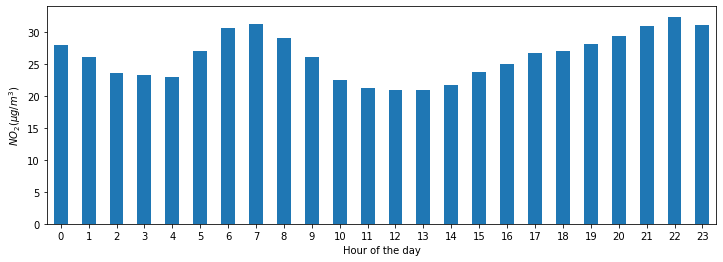

In [109]:
fig, ax = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind="bar", rot=0, ax=ax
)

ax.set_xlabel("Hour of the day")
# custom x label using matplotlib

ax.set_ylabel("$NO_2 (µg/m^3)$");

Similar to the previous case, we want to calculate a given statistic (e.g. mean $NO_2$ ) for each hour of the day and we can use the split-apply-combine approach again. For this case, we use the datetime property hour of pandas Timestamp, which is also accessible by the dt accessor.

## Datetime comme index

In the tutorial on reshaping, pivot() was introduced to reshape the data table with each of the measurements locations as a separate column:

In [110]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


<div class='alert alert-info'>

By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the set_index function.

</div>


Working with a datetime index (i.e. DatetimeIndex) provides powerful functionalities. For example, we do not need the dt accessor to get the time series properties, but have these properties available on the index directly:

In [111]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Some other advantages are the convenient subsetting of time period or the adapted time scale on plots. Let’s apply this on our data.

? Create a plot of the $NO_2$ values in the different stations from the 20th of May till the end of 21st of May

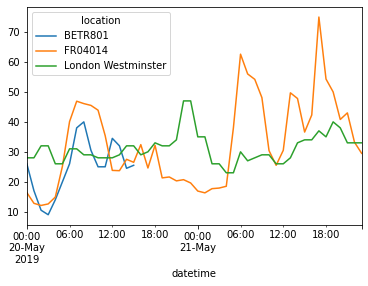

In [112]:
no_2["2019-05-20":"2019-05-21"].plot();

> By providing a string that parses to a datetime, a specific subset of the data can be selected on a DatetimeIndex.

### Resample a time series to another frequency

? Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [113]:
monthly_max = no_2.resample("M").max()

monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


> A very powerful method on time series data with a datetime index, is the ability to resample() time series to another frequency (e.g., converting secondly data into 5-minutely data).

The `.resample()` method is similar to a groupby operation:

- it provides a time-based grouping, by using a string (e.g. M, 5H,…) that defines the target frequency
- it requires an aggregation function such as mean, max,…

When defined, the frequency of the time series is provided by the freq attribute:


In [114]:
monthly_max.index.freq

<MonthEnd>

? Make a plot of the daily mean value in each of the stations.

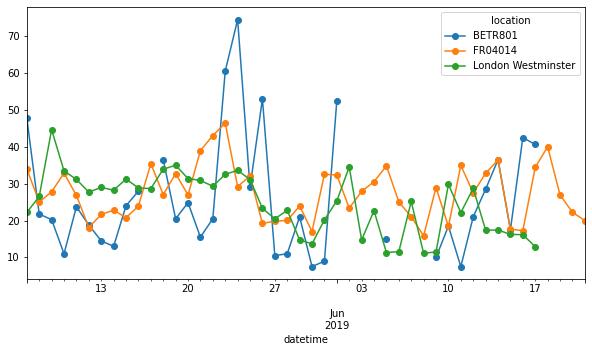

In [115]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

<div class='alert alert-info'>


REMEMBER

- Valid date strings can be converted to datetime objects using to_datetime function or as part of read functions.
- Datetime objects in pandas support calculations, logical operations and convenient date-related properties using the dt accessor.
- A DatetimeIndex contains these date-related properties and supports convenient slicing.
- Resample is a powerful method to change the frequency of a time series.



</div>

## Comment manipuler des données textuelles ?

Données utilisée dans cette section : Titanic

In [116]:
titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


? Make all name characters lowercase.

In [117]:
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object



> To make each of the strings in the Name column lowercase, select the Name column (see the tutorial on selection of data), add the str accessor and apply the lower method. As such, each of the strings is converted element-wise.

Similar to datetime objects in the time series tutorial having a dt accessor, a number of specialized string methods are available when using the str accessor. These methods have in general matching names with the equivalent built-in string methods for single elements, but are applied element-wise (remember element-wise calculations?) on each of the values of the columns.

? Create a new column Surname that contains the surname of the passengers by extracting the part before the comma.

In [118]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

Using the Series.str.split() method, each of the values is returned as a list of 2 elements. The first element is the part before the comma and the second element is the part after the comma.

In [119]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)

titanic["Surname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

As we are only interested in the first part representing the surname (element 0), we can again use the str accessor and apply Series.str.get() to extract the relevant part. Indeed, these string functions can be concatenated to combine multiple functions at once!

? Extract the passenger data about the countesses on board of the Titanic.

In [120]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [121]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


> (Interested in her story? See [Wikipedia](https://fr.wikipedia.org/wiki/Lucy_No%C3%ABl_Leslie_Martha)!)
>
> The string method Series.str.contains() checks for each of the values in the column Name if the string contains the word Countess and returns for each of the values True (Countess is part of the name) or False (Countess is not part of the name). This output can be used to subselect the data using conditional (boolean) indexing introduced in the subsetting of data tutorial. As there was only one countess on the Titanic, we get one row as a result.

<div class='alert alert-info'>
More powerful extractions on strings are supported, as the Series.str.contains() and Series.str.extract() methods accept regular expressions, but out of scope of this tutorial.
</div>

? Which passenger of the Titanic has the longest name?

In [122]:
titanic["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

To get the longest name we first have to get the lengths of each of the names in the Name column. By using pandas string methods, the Series.str.len() function is applied to each of the names individually (element-wise).

In [123]:
titanic["Name"].str.len().idxmax()

307

Next, we need to get the corresponding location, preferably the index label, in the table for which the name length is the largest. The idxmax() method does exactly that. It is not a string method and is applied to integers, so no str is used.

In [124]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

Based on the index name of the row (307) and the column (Name), we can do a selection using the loc operator, introduced in the tutorial on subsetting.

? In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”.

In [125]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})

titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object

Whereas replace() is not a string method, it provides a convenient way to use mappings or vocabularies to translate certain values. It requires a dictionary to define the mapping {from : to}.


<div class='alert alert-warning'>
    
There is also a replace() method available to replace a specific set of characters. However, when having a mapping of multiple values, this would become:

`titanic["Sex_short"] = titanic["Sex"].str.replace("female", "F")`

`titanic["Sex_short"] = titanic["Sex_short"].str.replace("male", "M")`

This would become cumbersome and easily lead to mistakes. Just think (or try out yourself) what would happen if those two statements are applied in the opposite order…
    
</div>

<div class='alert alert-success'>

REMEMBER

- String methods are available using the str accessor.
-String methods work element-wise and can be used for conditional indexing.
- The replace method is a convenient method to convert values according to a given dictionary.


</div>

## Ressources supplémentaires


<div>
<section id="community-tutorials">
<span id="communitytutorials"></span><h1>Community tutorials<a class="headerlink" href="#community-tutorials" title="Permalink to this headline">¶</a></h1>
<p>This is a guide to many pandas tutorials by the community, geared mainly for new users.</p>
<section id="pandas-cookbook-by-julia-evans">
<h2>pandas cookbook by Julia Evans<a class="headerlink" href="#pandas-cookbook-by-julia-evans" title="Permalink to this headline">¶</a></h2>
<p>The goal of this 2015 cookbook (by <a class="reference external" href="https://jvns.ca">Julia Evans</a>) is to
give you some concrete examples for getting started with pandas. These
are examples with real-world data, and all the bugs and weirdness that
entails.
For the table of contents, see the <a class="reference external" href="https://github.com/jvns/pandas-cookbook">pandas-cookbook GitHub
repository</a>.</p>
</section>
<section id="pandas-workshop-by-stefanie-molin">
<h2>pandas workshop by Stefanie Molin<a class="headerlink" href="#pandas-workshop-by-stefanie-molin" title="Permalink to this headline">¶</a></h2>
<p>An introductory workshop by <a class="reference external" href="https://github.com/stefmolin">Stefanie Molin</a>
designed to quickly get you up to speed with pandas using real-world datasets.
It covers getting started with pandas, data wrangling, and data visualization
(with some exposure to matplotlib and seaborn). The
<a class="reference external" href="https://github.com/stefmolin/pandas-workshop">pandas-workshop GitHub repository</a>
features detailed environment setup instructions (including a Binder environment),
slides and notebooks for following along, and exercises to practice the concepts.
There is also a lab with new exercises on a dataset not covered in the workshop for
additional practice.</p>
</section>
<section id="learn-pandas-by-hernan-rojas">
<h2>Learn pandas by Hernan Rojas<a class="headerlink" href="#learn-pandas-by-hernan-rojas" title="Permalink to this headline">¶</a></h2>
<p>A set of lesson for new pandas users: <a class="reference external" href="https://bitbucket.org/hrojas/learn-pandas">https://bitbucket.org/hrojas/learn-pandas</a></p>
</section>
<section id="practical-data-analysis-with-python">
<h2>Practical data analysis with Python<a class="headerlink" href="#practical-data-analysis-with-python" title="Permalink to this headline">¶</a></h2>
<p>This <a class="reference external" href="https://wavedatalab.github.io/datawithpython">guide</a> is an introduction to the data analysis process using the Python data ecosystem and an interesting open dataset.
There are four sections covering selected topics as <a class="reference external" href="https://wavedatalab.github.io/datawithpython/munge.html">munging data</a>,
<a class="reference external" href="https://wavedatalab.github.io/datawithpython/aggregate.html">aggregating data</a>, <a class="reference external" href="https://wavedatalab.github.io/datawithpython/visualize.html">visualizing data</a>
and <a class="reference external" href="https://wavedatalab.github.io/datawithpython/timeseries.html">time series</a>.</p>
</section>
<section id="exercises-for-new-users">
<span id="tutorial-exercises-new-users"></span><h2>Exercises for new users<a class="headerlink" href="#exercises-for-new-users" title="Permalink to this headline">¶</a></h2>
<p>Practice your skills with real data sets and exercises.
For more resources, please visit the main <a class="reference external" href="https://github.com/guipsamora/pandas_exercises">repository</a>.</p>
</section>
<section id="modern-pandas">
<span id="tutorial-modern"></span><h2>Modern pandas<a class="headerlink" href="#modern-pandas" title="Permalink to this headline">¶</a></h2>
<p>Tutorial series written in 2016 by
<a class="reference external" href="https://github.com/TomAugspurger">Tom Augspurger</a>.
The source may be found in the GitHub repository
<a class="reference external" href="https://github.com/TomAugspurger/effective-pandas">TomAugspurger/effective-pandas</a>.</p>
<ul class="simple">
<li><p><a class="reference external" href="https://tomaugspurger.github.io/modern-1-intro.html">Modern Pandas</a></p></li>
<li><p><a class="reference external" href="https://tomaugspurger.github.io/method-chaining.html">Method Chaining</a></p></li>
<li><p><a class="reference external" href="https://tomaugspurger.github.io/modern-3-indexes.html">Indexes</a></p></li>
<li><p><a class="reference external" href="https://tomaugspurger.github.io/modern-4-performance.html">Performance</a></p></li>
<li><p><a class="reference external" href="https://tomaugspurger.github.io/modern-5-tidy.html">Tidy Data</a></p></li>
<li><p><a class="reference external" href="https://tomaugspurger.github.io/modern-6-visualization.html">Visualization</a></p></li>
<li><p><a class="reference external" href="https://tomaugspurger.github.io/modern-7-timeseries.html">Timeseries</a></p></li>
</ul>
</section>
<section id="excel-charts-with-pandas-vincent-and-xlsxwriter">
<h2>Excel charts with pandas, vincent and xlsxwriter<a class="headerlink" href="#excel-charts-with-pandas-vincent-and-xlsxwriter" title="Permalink to this headline">¶</a></h2>
<ul class="simple">
<li><p><a class="reference external" href="https://pandas-xlsxwriter-charts.readthedocs.io/">Using Pandas and XlsxWriter to create Excel charts</a></p></li>
</ul>
</section>
<section id="video-tutorials">
<h2>Video tutorials<a class="headerlink" href="#video-tutorials" title="Permalink to this headline">¶</a></h2>
<ul class="simple">
<li><p><a class="reference external" href="https://www.youtube.com/watch?v=5JnMutdy6Fw">Pandas From The Ground Up</a>
(2015) (2:24)
<a class="reference external" href="https://github.com/brandon-rhodes/pycon-pandas-tutorial">GitHub repo</a></p></li>
<li><p><a class="reference external" href="https://www.youtube.com/watch?v=-NR-ynQg0YM">Introduction Into Pandas</a>
(2016) (1:28)
<a class="reference external" href="https://github.com/chendaniely/2016-pydata-carolinas-pandas">GitHub repo</a></p></li>
<li><p><a class="reference external" href="https://www.youtube.com/watch?v=7vuO9QXDN50">Pandas: .head() to .tail()</a>
(2016) (1:26)
<a class="reference external" href="https://github.com/TomAugspurger/pydata-chi-h2t">GitHub repo</a></p></li>
<li><p><a class="reference external" href="https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y">Data analysis in Python with pandas</a>
(2016-2018)
<a class="reference external" href="https://github.com/justmarkham/pandas-videos">GitHub repo</a> and
<a class="reference external" href="https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb">Jupyter Notebook</a></p></li>
<li><p><a class="reference external" href="https://www.youtube.com/playlist?list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6">Best practices with pandas</a>
(2018)
<a class="reference external" href="https://github.com/justmarkham/pycon-2018-tutorial">GitHub repo</a> and
<a class="reference external" href="https://nbviewer.org/github/justmarkham/pycon-2018-tutorial/blob/master/tutorial.ipynb">Jupyter Notebook</a></p></li>
</ul>
</section>
<section id="various-tutorials">
<h2>Various tutorials<a class="headerlink" href="#various-tutorials" title="Permalink to this headline">¶</a></h2>
<ul class="simple">
<li><p><a class="reference external" href="https://wesmckinney.com/archives.html">Wes McKinney’s (pandas BDFL) blog</a></p></li>
<li><p><a class="reference external" href="http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/">Statistical analysis made easy in Python with SciPy and pandas DataFrames, by Randal Olson</a></p></li>
<li><p><a class="reference external" href="https://conference.scipy.org/scipy2013/tutorial_detail.php?id=109">Statistical Data Analysis in Python, tutorial videos, by Christopher Fonnesbeck from SciPy 2013</a></p></li>
<li><p><a class="reference external" href="https://nbviewer.ipython.org/github/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb">Financial analysis in Python, by Thomas Wiecki</a></p></li>
<li><p><a class="reference external" href="http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/">Intro to pandas data structures, by Greg Reda</a></p></li>
<li><p><a class="reference external" href="https://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/">Pandas and Python: Top 10, by Manish Amde</a></p></li>
<li><p><a class="reference external" href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python">Pandas DataFrames Tutorial, by Karlijn Willems</a></p></li>
<li><p><a class="reference external" href="https://tutswiki.com/pandas-cookbook/chapter1/">A concise tutorial with real life examples</a></p></li>
</ul>
</section>
</section>
</div>



In [126]:
# delete folders before saving and commiting
!rm -r data/
!rm -r export/